In [1]:
import matplotlib.pyplot as plt
import networkx as nx


Aucun cycle détecté.
Chemin critique : PropositionInitiale -> ValidationProjet -> DefinitionBesoins -> ChoixTechnologies -> MiseEnPlaceOutils -> DéveloppementApplication -> IntegrationPipelineApplication -> FonctionnalitesReEntrainement -> ValidationDeploiements -> Rapport
Durée totale du projet : 58 jours


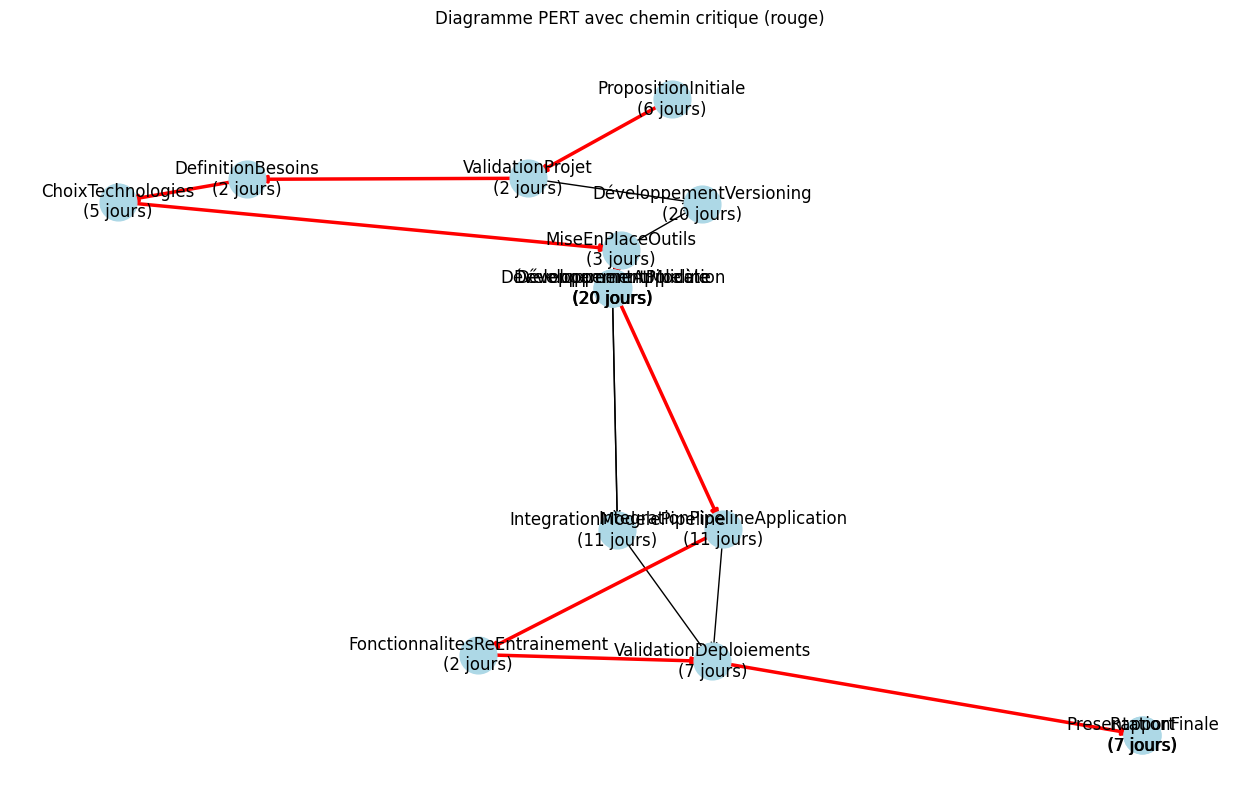

In [12]:
from dataclasses import dataclass
import networkx as nx
import matplotlib.pyplot as plt

@dataclass
class Task:
    name: str
    start: int
    end: int
    duration: int

# Définir les tâches
tasks = {
    'PropositionInitiale': Task('PropositionInitiale', 0, 6, 6),
    'ValidationProjet': Task('ValidationProjet', 6, 8, 2),
    'DefinitionBesoins': Task('DefinitionBesoins', 8, 10, 2),
    'ChoixTechnologies': Task('ChoixTechnologies', 10, 15, 5),
    'MiseEnPlaceOutils': Task('MiseEnPlaceOutils', 15, 18, 3),
    'DéveloppementApplication': Task('DéveloppementApplication', 18, 38, 20),
    'DéveloppementModèle': Task('DéveloppementModèle', 18, 38, 20),
    'DéveloppementPipeline': Task('DéveloppementPipeline', 18, 38, 20),
    'DéveloppementVersioning': Task('DéveloppementVersioning', 18, 38, 20),
    'IntegrationModelePipeline': Task('IntegrationModelePipeline', 38, 49, 11),
    'IntegrationPipelineApplication': Task('IntegrationPipelineApplication', 38, 49, 11),
    'FonctionnalitesReEntrainement': Task('FonctionnalitesReEntrainement', 49, 51, 2),
    'ValidationDeploiements': Task('ValidationDeploiements', 49, 56, 7),
    'Rapport': Task('Rapport', 49, 56, 7),
    'PresentationFinale': Task('PresentationFinale', 49, 56, 7),
}

# Définir les dépendances
dependencies = [
    ('PropositionInitiale', 'ValidationProjet'),
    ('ValidationProjet', 'DefinitionBesoins'),
    ('ValidationProjet', 'DéveloppementVersioning'),
    ('DefinitionBesoins', 'ChoixTechnologies'),
    ('ChoixTechnologies', 'MiseEnPlaceOutils'),
    ('MiseEnPlaceOutils', 'DéveloppementApplication'),
    ('MiseEnPlaceOutils', 'DéveloppementModèle'),
    ('MiseEnPlaceOutils', 'DéveloppementPipeline'),
    ('MiseEnPlaceOutils', 'DéveloppementVersioning'),
    ('DéveloppementModèle', 'IntegrationModelePipeline'),
    ('DéveloppementPipeline', 'IntegrationModelePipeline'),
    ('DéveloppementApplication', 'IntegrationPipelineApplication'),
    ('IntegrationPipelineApplication', 'FonctionnalitesReEntrainement'),
    ('IntegrationPipelineApplication', 'ValidationDeploiements'),
    ('FonctionnalitesReEntrainement', 'ValidationDeploiements'),
    ('IntegrationModelePipeline', 'ValidationDeploiements'),
    ('ValidationDeploiements', 'Rapport'),
    ('ValidationDeploiements', 'PresentationFinale'),
]

# Vérifier s'il y a un cycle dans le graphe
def check_for_cycles(G):
    try:
        # Utilise une fonction intégrée pour vérifier si le graphe est un DAG (Directed Acyclic Graph)
        cycles = list(nx.find_cycle(G, orientation="original"))
        if cycles:
            print("Cycle détecté :", cycles)
        else:
            print("Aucun cycle détecté.")
    except nx.NetworkXNoCycle:
        print("Aucun cycle détecté.")

# Créer le graphe
def create_pert_graph(tasks, dependencies):
    G = nx.DiGraph()
    for task_id, task in tasks.items():
        G.add_node(task_id, name=task.name, duration=task.duration)
    for dep in dependencies:
        G.add_edge(dep[0], dep[1], weight=tasks[dep[0]].duration)
    return G

# Calculer le chemin critique
def find_critical_path(G):
    check_for_cycles(G)
    try:
        critical_path = nx.dag_longest_path(G, weight='weight')
        total_duration = nx.dag_longest_path_length(G, weight='weight')
        return critical_path, total_duration
    except nx.NetworkXUnfeasible:
        print("Le graphe contient un cycle.")
        return None, None

# Visualiser le graphe PERT
def visualize_pert(G, tasks, critical_path):
    # pos = nx.spring_layout(G, iterations=1000, weight=)
    for task_id, task in tasks.items():
        assert task.duration > 0, f"La durée de la tâche {task_id} est invalide."

    pos = nx.kamada_kawai_layout(G)
    plt.figure(figsize=(16, 10))
    
    # Dessiner les nœuds
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')
    nx.draw_networkx_labels(G, pos, labels={node: f"{node}\n({tasks[node].duration} jours)" for node in G.nodes})
    
    # Dessiner les arêtes
    nx.draw_networkx_edges(G, pos, edgelist=G.edges, arrowstyle='->', arrowsize=10, edge_color='black')
    
    # Mettre en évidence le chemin critique
    critical_edges = list(zip(critical_path, critical_path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=critical_edges, edge_color='red', width=2.5)
    
    plt.title("Diagramme PERT avec chemin critique (rouge)")
    plt.axis('off')
    plt.show()

# Créer le graphe et calculer le chemin critique
G = create_pert_graph(tasks, dependencies)
critical_path, total_duration = find_critical_path(G)

print("Chemin critique :", " -> ".join(critical_path))
print(f"Durée totale du projet : {total_duration} jours")

# Visualiser le graphe
visualize_pert(G, tasks, critical_path)
